In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('D:\dev\project\Football-Match-Prediction\data\processed\df_merged.csv')

In [2]:
data.head()

,HomeTeam_GF_WeightedAvg,HomeTeam_GA_WeightedAvg,HomeTeam_xG_WeightedAvg,HomeTeam_xGA_WeightedAvg,HomeTeam_Standard__SoT_WeightedAvg,HomeTeam_Standard__SoT%_WeightedAvg,HomeTeam_Standard__G/Sh_WeightedAvg,HomeTeam_Standard__G/SoT_WeightedAvg,HomeTeam_Expected__npxG/Sh_WeightedAvg,HomeTeam_Expected__G-xG_WeightedAvg,...,AwayTeam_Touches__Att Pen_WeightedAvg,AwayTeam_Carries__CPA_WeightedAvg,AwayTeam_Points_WeightedAvg,AwayTeam_GD_WeightedAvg,H2H_Total_Matches,H2H_Home_Wins,H2H_Away_Wins,H2H_Draws,H2H_Home_Goals,H2H_Away_Goals
0,3.0,2.0,2.1,1.8,5.0,41.7,0.17,0.40000,0.11,0.9,...,9.0,3.0,0.0,-1.0,0,0,0,0,0.0,0.0
1,0.0,2.0,0.1,1.1,0.0,0.0,0.00,0.26903,0.04,-0.1,...,23.0,7.0,0.0,-1.0,0,0,0,0,0.0,0.0
2,0.0,1.0,1.1,1.3,4.0,50.0,0.00,0.00000,0.04,-1.1,...,36.0,15.0,3.0,2.0,0,0,0,0,0.0,0.0
3,1.0,0.0,1.4,0.5,2.0,15.4,0.00,0.00000,0.05,-0.4,...,17.0,5.0,0.0,-3.0,0,0,0,0,0.0,0.0
4,2.0,2.0,2.2,0.7,6.0,46.2,0.15,0.33000,0.17,-0.2,...,14.0,3.0,0.0,-1.0,0,0,0,0,0.0,0.0


In [3]:
data.describe()

,HomeTeam_GF_WeightedAvg,HomeTeam_GA_WeightedAvg,HomeTeam_xG_WeightedAvg,HomeTeam_xGA_WeightedAvg,HomeTeam_Standard__SoT_WeightedAvg,HomeTeam_Standard__SoT%_WeightedAvg,HomeTeam_Standard__G/Sh_WeightedAvg,HomeTeam_Standard__G/SoT_WeightedAvg,HomeTeam_Expected__npxG/Sh_WeightedAvg,HomeTeam_Expected__G-xG_WeightedAvg,...,AwayTeam_Touches__Att Pen_WeightedAvg,AwayTeam_Carries__CPA_WeightedAvg,AwayTeam_Points_WeightedAvg,AwayTeam_GD_WeightedAvg,H2H_Total_Matches,H2H_Home_Wins,H2H_Away_Wins,H2H_Draws,H2H_Home_Goals,H2H_Away_Goals
count,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,...,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000
mean,1.314806,1.302321,1.299659,1.319158,3.877018,34.176972,0.106136,0.296327,0.104470,-0.022687,...,19.262471,4.198011,1.394893,0.021735,8.577891,1.530099,1.604159,2.310106,10.945275,11.278366
std,0.416938,0.341934,0.292174,0.230036,0.952319,4.479798,0.027549,0.056247,0.014141,0.207799,...,4.524059,1.545972,0.423884,0.624816,7.132393,1.823685,1.848408,2.819795,11.060052,11.265129
min,0.000000,0.000000,0.000000,0.466667,0.000000,0.000000,0.000000,0.000000,0.020000,-1.471429,...,5.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.039306,1.132489,1.111055,1.160914,3.269812,31.689382,0.088817,0.268344,0.097736,-0.136268,...,16.456989,3.120724,1.133428,-0.362731,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,1.287094,1.309508,1.248820,1.298628,3.707219,33.688070,0.103638,0.299713,0.103810,-0.018416,...,18.133333,3.829882,1.320256,-0.059545,8.000000,1.000000,1.000000,2.000000,8.000000,8.000000
75%,1.450000,1.494792,1.395567,1.436750,4.181538,36.429809,0.122672,0.330807,0.112193,0.073744,...,20.678030,4.860294,1.566532,0.254810,14.000000,2.000000,2.000000,4.000000,16.000000,16.000000
max,4.000000,4.833333,2.900000,3.350000,8.000000,80.000000,0.279697,0.676667,0.223333,1.483333,...,41.000000,15.000000,3.000000,3.500000,28.000000,11.000000,12.000000,18.000000,76.000000,84.000000


In [4]:
from sklearn.preprocessing import StandardScaler


y = data['HomeTeam_Result'].map({'W' : 2, 'D' : 1, 'L' : 0})
X = data.drop(columns=['HomeTeam_Result', 'HomeTeam_GF', 'HomeTeam_GA', 'HomeTeam', 'AwayTeam'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# from sklearn.model_selection import cross_val_score

# models = {
#     'Logistic Regression': LogisticRegression(solver='liblinear'),
#     'Random Forest': RandomForestClassifier(),
#     'SVC': SVC()
# }

# for name, model in models.items():
#     scores = cross_val_score(model, X, y, cv=10)
#     print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.44      0.41      0.42       141
           1       0.45      0.06      0.10       162
           2       0.53      0.85      0.65       246

    accuracy                           0.50       549
   macro avg       0.47      0.44      0.39       549
weighted avg       0.48      0.50      0.43       549



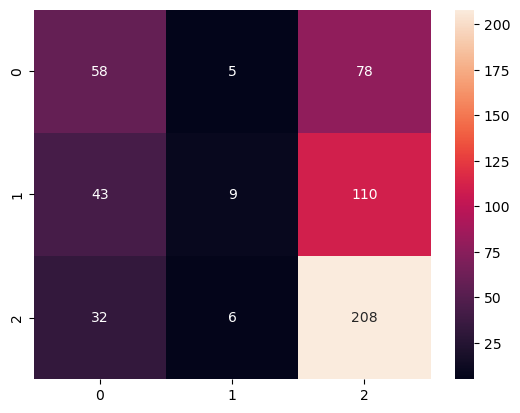

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d')
print(classification_report(y_test, y_pred))